<a href="https://colab.research.google.com/github/chimexi42/football-plotting/blob/main/football_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mplsoccer

  Created wheel for mplsoccer: filename=mplsoccer-0.0.21-cp36-none-any.whl size=32700 sha256=f7793312a7ad4a5aa682743d9b6bc8076635ce2d96ff8d774aaafd99478b7e72
  Stored in directory: /root/.cache/pip/wheels/b4/c3/eb/77c9eb9fd22579e5df94e53c2276e98c57bfc2b73eb4c94281
Successfully built mplsoccer


In [ ]:
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
plt.style.use('ggplot')


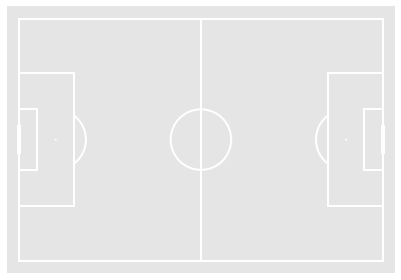

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)
pitch = Pitch()
pitch.draw(ax=ax[1])pitch = Pitch(figsize=(8, 4))  # specifying figure size is optional (width, height)
fig, ax = pitch.draw()

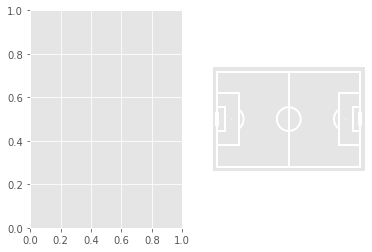

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2)
pitch = Pitch()
pitch.draw(ax=ax[1])

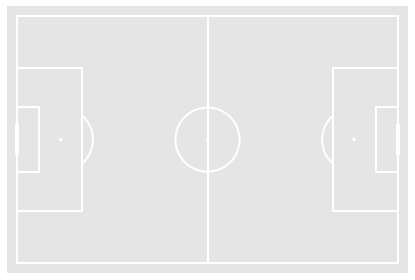

In [8]:
pitch = Pitch(pitch_type='opta')  # example plotting a statsperform pitch
fig, ax = pitch.draw()

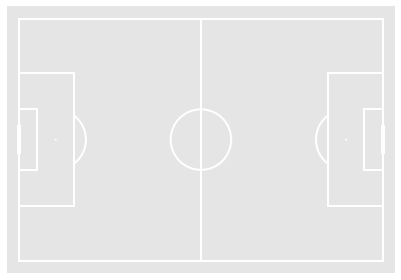

In [9]:
pitch = Pitch(orientation='horizontal', view='full')
fig, ax = pitch.draw()

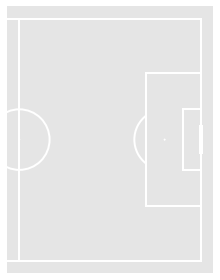

In [10]:
pitch = Pitch(orientation='horizontal', view='half')
fig = pitch.draw()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdd5f91d1d0>)

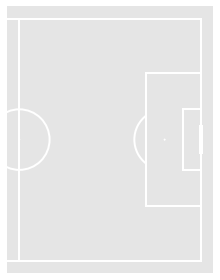

In [12]:
pitch.draw()

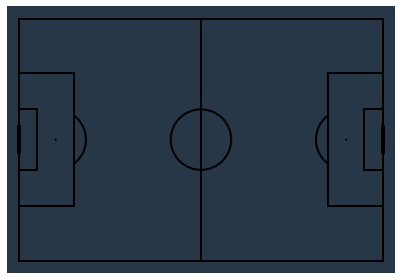

In [17]:
pitch = Pitch(pitch_color='#283747', line_color='black',
              stripe_color='#c2d59d', stripe=False)  # optional stripes
fig, ax = pitch.draw()

In [18]:
from mplsoccer.statsbomb import read_event, EVENT_SLUG
from matplotlib import rcParams

In [19]:
df = read_event(f'{EVENT_SLUG}/7478.json',
                related_event_df=False, shot_freeze_frame_df=False, tactics_lineup_df=False)['event']

/usr/local/lib/python3.6/dist-packages/mplsoccer/statsbomb.py:120: UserWarning: Please be responsible with Statsbomb data.Register your details on https://www.statsbomb.com/resource-centreand read the User Agreement carefully (on the same page).
  warnings.warn(statsbomb_warning)


In [20]:
team1 = 'Seattle Reign'
team2 = 'Houston Dash'
df_pass = df.loc[(df.pass_assisted_shot_id.notnull()) & (df.team_name == team1),
                 ['x', 'y', 'end_x', 'end_y', 'pass_assisted_shot_id']]

df_shot = df.loc[(df.type_name == 'Shot') & (df.team_name == team1),
                 ['id', 'outcome_name', 'shot_statsbomb_xg']].rename({'id': 'pass_assisted_shot_id'}, axis=1)

df_pass = df_pass.merge(df_shot, how='left').drop('pass_assisted_shot_id', axis=1)

mask_goal = df_pass.outcome_name == 'Goal'

In [21]:
df_pass

,x,y,end_x,end_y,outcome_name,shot_statsbomb_xg
0,77.0,1.0,108.0,27.0,Goal,0.109579
1,111.0,17.0,109.0,30.0,Off T,0.065542
2,92.0,41.0,103.0,31.0,Saved,0.231220
3,102.0,44.0,93.0,41.0,Off T,0.029704
4,58.0,52.0,112.0,31.0,Saved,0.071958
5,50.0,15.0,101.0,39.0,Saved,0.238050
6,83.0,1.0,109.0,31.0,Saved,0.065770
7,91.0,68.0,110.0,56.0,Off T,0.034578
8,86.0,46.0,109.0,36.0,Goal,0.387285


In [22]:
df_pass.head()

,x,y,end_x,end_y,outcome_name,shot_statsbomb_xg
0,77.0,1.0,108.0,27.0,Goal,0.109579
1,111.0,17.0,109.0,30.0,Off T,0.065542
2,92.0,41.0,103.0,31.0,Saved,0.231220
3,102.0,44.0,93.0,41.0,Off T,0.029704
4,58.0,52.0,112.0,31.0,Saved,0.071958


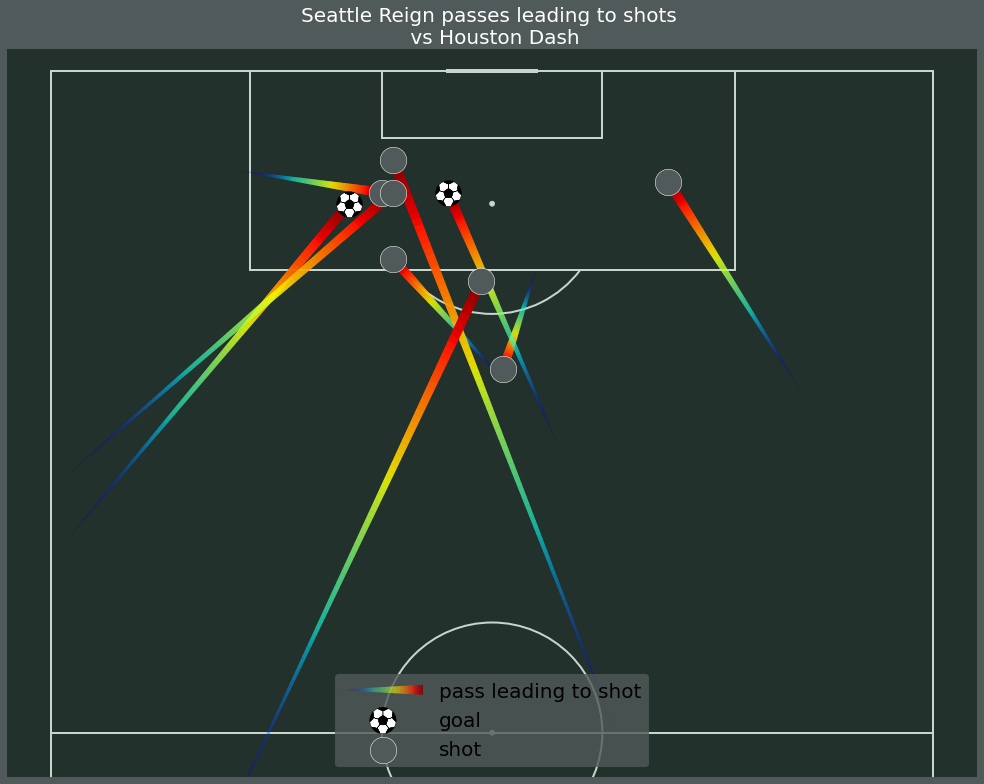

In [26]:
pitch = Pitch(pitch_type='statsbomb', orientation='vertical', pitch_color='#22312b', line_color='#c7d5cc',
              figsize=(16, 11), view='half', pad_top=2, tight_layout=True)
fig, ax = pitch.draw()

# Plot the completed passes
pitch.lines(df_pass.x, df_pass.y, df_pass.end_x, df_pass.end_y,
            lw=10, transparent=True, comet=True, cmap='jet',
            label='pass leading to shot', ax=ax)

# Plot the goals
pitch.scatter(df_pass[mask_goal].end_x, df_pass[mask_goal].end_y, s=700,
              marker='football', edgecolors='black', c='white', zorder=2,
              label='goal', ax=ax)
pitch.scatter(df_pass[~mask_goal].end_x, df_pass[~mask_goal].end_y,
              edgecolors='white', c='#515A5A', s=700, zorder=2,
              label='shot', ax=ax)
# Set the title
ax.set_title(f'{team1} passes leading to shots \n vs {team2}', fontsize=20, color = 'white')

# set legend
ax.legend(facecolor='#515A5A', edgecolor='None', fontsize=20, loc='lower center', handlelength=4)

# Set the figure facecolor
fig.set_facecolor('#515A5A')

In [27]:
from mplsoccer.pitch import Pitch
from mplsoccer.statsbomb import read_event, read_lineup, EVENT_SLUG, LINEUP_SLUG
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# get event and lineup dataframes for game 7478

# event data
dict_event = read_event(f'{EVENT_SLUG}/7478.json', related_event_df=False, tactics_lineup_df=False, warn=False)
df_event = dict_event['event']
df_freeze = dict_event['shot_freeze_frame']

# lineup data
df_lineup = read_lineup(f'{LINEUP_SLUG}/7478.json', warn=False)
df_lineup = df_lineup[['player_id', 'player_jersey_number', 'team_name']].copy()

In [28]:
shot_id = '8bb8bbc2-68a6-4c01-93de-53a194e7a1cf'
df_freeze_frame = df_freeze[df_freeze.id == shot_id].copy()
df_shot_event = df_event[df_event.id == shot_id].dropna(axis=1, how='all').copy()

# add the jersey number
df_freeze_frame = df_freeze_frame.merge(df_lineup, how='left', on='player_id')

In [29]:
# strings for team names
team1 = df_shot_event.team_name.iloc[0]
team2 = list(set(df_event.team_name.unique()) - set([team1]))[0]

# subset the team shooting, and the opposition (goalkeeper/ other)
df_team1 = df_freeze_frame[df_freeze_frame.team_name == team1]
df_team2_goal = df_freeze_frame[(df_freeze_frame.team_name == team2) &
                                (df_freeze_frame.player_position_name == 'Goalkeeper')]
df_team2_other = df_freeze_frame[(df_freeze_frame.team_name == team2) &
                                 (df_freeze_frame.player_position_name != 'Goalkeeper')]

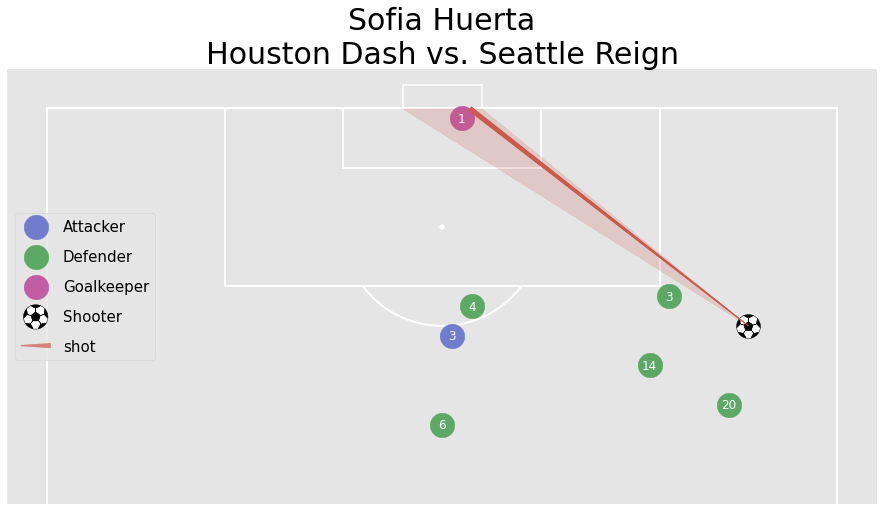

In [30]:
figsize = (16, 8)
pitch = Pitch(figsize=figsize, orientation='vertical', view='half', tight_layout=False, goal_type='box', pad_bottom=-20)
fig, ax = pitch.draw()

# Plot the players
sc1 = pitch.scatter(df_team1.x, df_team1.y, s=600, c='#727cce', label='Attacker', ax=ax)
sc2 = pitch.scatter(df_team2_other.x, df_team2_other.y, s=600, c='#5ba965', label='Defender', ax=ax)
sc4 = pitch.scatter(df_team2_goal.x, df_team2_goal.y, s=600, ax=ax, c='#c15ca5', label='Goalkeeper')

# plot the shot
sc3 = pitch.scatter(df_shot_event.x, df_shot_event.y, marker='football', s=600, ax=ax, label='Shooter', zorder=1.2)
line = pitch.lines(df_shot_event.x, df_shot_event.y,
                   df_shot_event.end_x, df_shot_event.end_y, comet=True, label='shot', color='#cb5a4c', ax=ax)

# plot the angle to the goal
pitch.goal_angle(df_shot_event.x, df_shot_event.y, ax=ax, alpha=0.2, zorder=1.1, color='#cb5a4c', goal='right')

# plot the jersey numbers
for i, label in enumerate(df_freeze_frame.player_jersey_number):
    pitch.annotate(label, (df_freeze_frame.x[i], df_freeze_frame.y[i]),
                   va='center', ha='center', color='white', fontsize=12, ax=ax)

# add a legend and title
legend = ax.legend(loc='center left', labelspacing=1, fontsize=12)
title = ax.set_title(f'{df_shot_event.player_name.iloc[0]}\n{team1} vs. {team2}', fontsize=30)